In [5]:
import pandas as pd

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = 'D:/data/ventilator-pressure-prediction/'

train_data = pd.read_csv(DATA_PATH+'train.csv',index_col=0)
test_data  = pd.read_csv(DATA_PATH+'test.csv', index_col=0)
sample     = pd.read_csv(DATA_PATH+'sample_submission.csv')

C:\Users\codef\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [38]:
train_data

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...
6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035998,125749,50,10,2.571408,1.558978,1,3.798729


In [29]:
lengths = train_data.groupby("breath_id")["time_step"].max()
lengths

breath_id
1         2.689766
2         2.690624
3         2.525398
4         2.528579
5         2.724876
            ...   
125740    2.721422
125742    2.665376
125743    2.666352
125745    2.508653
125749    2.638017
Name: time_step, Length: 75450, dtype: float64

In [33]:
pd.sort(lengths)

AttributeError: module 'pandas' has no attribute 'sort'

In [31]:
lengths.min(), lengths.max()

(2.4968085289001465, 2.9372379779815674)

In [34]:
lengths.sort_values()

breath_id
49772     2.496809
8522      2.496965
8126      2.496970
78837     2.497185
4159      2.497271
            ...   
38415     2.905639
111439    2.928005
36175     2.934589
55851     2.936345
44245     2.937238
Name: time_step, Length: 75450, dtype: float64

In [36]:
def plot_hist(x, ylim, title, bins=5000):

    fig, ax = plt.subplots(1,1,figsize=(30,3))

    plt.hist(x, density=True, bins=bins)
    plt.ylabel('density')
    plt.xlabel(title)
    plt.ylim(ylim)

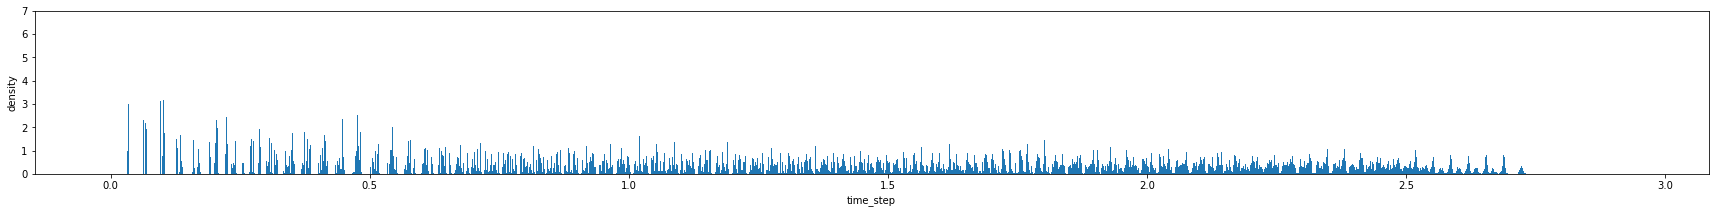

In [37]:
plot_hist(train_data.time_step, (0,7), 'time_step')

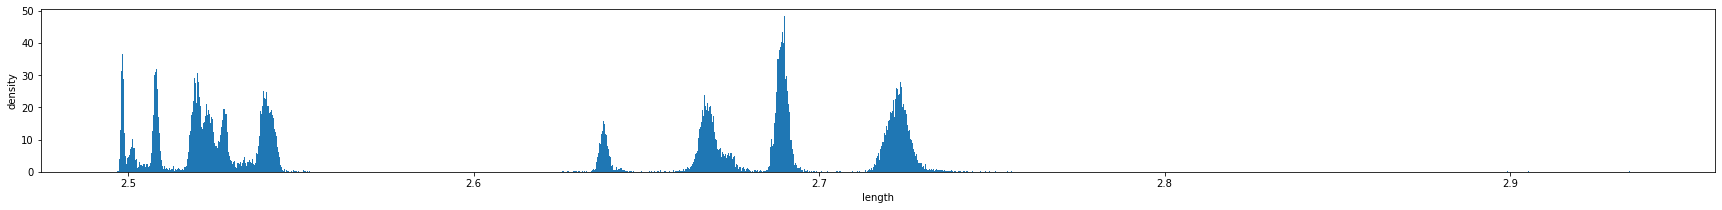

In [25]:
plot_hist(train_data.groupby("breath_id")["time_step"].max().values, (-2,2), 'length')